In [1]:
import pandas as pd
import numpy as np
from bff_processor.data_tools import regex_select, get_files, make_df
from bff_processor.utils import time_func, hist2unc, linear, parabola, significance, power_func, apply_multiple_filters
from bff_processor.bff_meta import preselection, band_cut, isin, identity
from bff_processor.plotting_utils import produce_bff_hists, boost_plot, boost_plot2d, unc_plot
import boost_histogram as bh
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use(hep.style.CMS)

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    })

In [3]:
# get 2017 files
#era = 2016
era = 9999
#file_re = regex_select(era)
#print(file_re)
file_re = 'tw_(?:2016|2017|2018).+\.csv'
file_dict = get_files(file_re)

In [4]:
file_dict

{'DY': ['data/tw_2017_ZToEE_M_120_200.csv',
  'data/tw_2018_ZToEE_M_50_120.csv',
  'data/tw_2018_ZToEE_M_400_800.csv',
  'data/tw_2017_ZToEE_M_400_800.csv',
  'data/tw_2016_ZToMuMu_M_800_1400.csv',
  'data/tw_2018_ZToEE_M_120_200.csv',
  'data/tw_2018_ZToMuMu_M_120_200.csv',
  'data/tw_2016_ZToMuMu_M_120_200.csv',
  'data/tw_2018_ZToEE_M_800_1400.csv',
  'data/tw_2016_ZToMuMu_M_400_800.csv',
  'data/tw_2017_ZToMuMu_M_50_120.csv',
  'data/tw_2016_ZToEE_M_400_800.csv',
  'data/tw_2018_ZToMuMu_M_200_400.csv',
  'data/tw_2016_ZToEE_M_200_400.csv',
  'data/tw_2016_ZToMuMu_M_50_120.csv',
  'data/tw_2018_ZToEE_M_200_400.csv',
  'data/tw_2017_ZToMuMu_M_400_800.csv',
  'data/tw_2017_ZToMuMu_M_800_1400.csv',
  'data/tw_2017_ZToMuMu_M_200_400.csv',
  'data/tw_2017_ZToEE_M_200_400.csv',
  'data/tw_2017_ZToEE_M_50_120.csv',
  'data/tw_2018_ZToMuMu_M_400_800.csv',
  'data/tw_2018_ZToMuMu_M_50_120.csv',
  'data/tw_2016_ZToMuMu_M_200_400.csv',
  'data/tw_2018_ZToMuMu_M_800_1400.csv',
  'data/tw_2016_Z

In [5]:
#make df of background
backgrounds = file_dict['DY']+file_dict['TT']+file_dict['ST']+file_dict['VB']
background_df = preselection()(make_df(backgrounds))

In [6]:
#make df of signals
import re
bff_dict = {}
for fname in file_dict['BFF']:
    #print(fname)
    name = re.findall('_M_([0-9]+)_dbs(\d)p(\d+)', fname)[0]
    name = "{} {}.{}".format(*name)
    #print(name)
    if name not in bff_dict:
        bff_dict[name] = []
    bff_dict[name].append(fname)
for name, item in bff_dict.items():
    if len(item) != 3: continue
    print(item)
    bff_dict[name] = preselection()(make_df(item))
bff_samples = ['125 0.04', '150 0.04', '200 0.04','250 0.04', '300 0.04', '350 0.04','400 0.04','450 0.04','500 0.04']
bff_dict.keys()

['data/tw_2018_BFFZprimeToMuMu_M_350_dbs0p04.csv', 'data/tw_2016_BFFZprimeToMuMu_M_350_dbs0p04.csv', 'data/tw_2017_BFFZprimeToMuMu_M_350_dbs0p04.csv']
['data/tw_2018_BFFZprimeToMuMu_M_150_dbs0p04.csv', 'data/tw_2016_BFFZprimeToMuMu_M_150_dbs0p04.csv', 'data/tw_2017_BFFZprimeToMuMu_M_150_dbs0p04.csv']
['data/tw_2018_BFFZprimeToMuMu_M_125_dbs0p04.csv', 'data/tw_2017_BFFZprimeToMuMu_M_125_dbs0p04.csv', 'data/tw_2016_BFFZprimeToMuMu_M_125_dbs0p04.csv']
['data/tw_2017_BFFZprimeToMuMu_M_500_dbs0p04.csv', 'data/tw_2018_BFFZprimeToMuMu_M_500_dbs0p04.csv', 'data/tw_2016_BFFZprimeToMuMu_M_500_dbs0p04.csv']
['data/tw_2018_BFFZprimeToMuMu_M_175_dbs0p04.csv', 'data/tw_2017_BFFZprimeToMuMu_M_175_dbs0p04.csv', 'data/tw_2016_BFFZprimeToMuMu_M_175_dbs0p04.csv']
['data/tw_2017_BFFZprimeToMuMu_M_350_dbs1p0.csv', 'data/tw_2016_BFFZprimeToMuMu_M_350_dbs1p0.csv', 'data/tw_2018_BFFZprimeToMuMu_M_350_dbs1p0.csv']
['data/tw_2018_BFFZprimeToMuMu_M_200_dbs0p5.csv', 'data/tw_2016_BFFZprimeToMuMu_M_200_dbs0p5.csv'

dict_keys(['350 0.04', '150 0.04', '125 0.04', '400 0.04', '300 0.04', '500 0.04', '175 0.04', '350 1.0', '450 0.04', '200 0.5', '250 0.04', '500 0.5', '500 1.0', '200 1.0', '200 0.04', '350 0.5'])

In [7]:
bff_samples = ['125 0.04', '150 0.04', '200 0.04', '350 0.04', '500 0.04']

In [8]:
columns = [
    ['DiLepMass', [139,105,800]],
    ['TMB_nom',       [80,0, 800]],
    ['HTLT_nom',      [100,-500,500]],
    ['RelMET_nom',    [100, 0,1]]
]

In [9]:
#optimize RelMET cut:
def column_1d_sig(sig_df, bck_df, mass_band=1, filter_func=lambda x: x):
    #select for region
    _sig_df = filter_func(sig_df)
    _bck_df =  filter_func(bck_df)
    mean, std = sig_df['DiLepMass'].mean(), sig_df['DiLepMass'].std()
    widht = std*mass_band
    #mass band cut
    _sig_df = band_cut('DiLepMass',mean-widht, mean+widht)(_sig_df)
    _bck_df = band_cut('DiLepMass',mean-widht, mean+widht)(_bck_df)
    bck_1d_hist, bck_2d_hist = produce_bff_hists(_bck_df, "", columns, weight='Weight')
    sig_1d_hist, sig_2d_hist = produce_bff_hists(_sig_df, "", columns, weight='Weight')
    return bck_1d_hist, sig_1d_hist, bck_2d_hist, sig_2d_hist

In [10]:
def calc_sig_cut(s,b, direction=1):
    from itertools import accumulate
    s,b = np.array(list(accumulate(s[::direction])))[::direction], np.array(list(accumulate(b[::direction])))[::direction]
    return significance(s,b)

In [11]:
from scipy.stats import norm
def map_signf(value, signf, centers):
    diff = np.abs(centers - value)
    delta  = (centers[1] - centers[0])
    weight = norm.pdf(diff, loc=0, scale=delta*1)
    wval = np.dot(signf,weight)/np.sum(weight+1e-12)
    return wval.nominal_value


In [12]:
def fit_sig(masses, sigs, centers, fit_function, *popt):
    signfs = []
    for m, sig in zip(masses,sigs):
        cut_val = fit_function(m,*popt)
        signf = map_signf(cut_val, sig, centers)
        signfs.append(signf+1e-12)
    return np.dot(-np.array(signfs), np.power(masses, 0))

In [13]:
from scipy.optimize import curve_fit, minimize, differential_evolution
from bff_processor.utils import vunc2nom, vunc2std
import uncertainties

In [14]:
def plot_opt_sig(column,bff_dict, background_df, func2fit, minimize_func=True,  filter_func=lambda x: x, postfix="",direction=1, p0=[0,.5], title_size=20):
    fig,ax = plt.subplots(2,len(bff_samples), figsize=[38,15])
    fit_x = []
    fit_y = []
    fit_y_unc = []
    sigs = []
    masses = []
    for j, m in enumerate(bff_samples):
        mass = int(re.findall('([0-9]+)',m)[0])
        if m not in bff_dict: continue
        bck_1d_hist, sig_1d_hist, bck_2d_hist, sig_2d_hist = column_1d_sig(bff_dict[m], background_df, mass_band=2,filter_func=filter_func)
        
        top_ax = ax[0,j]
        top_ax.set_xlabel(column.replace('_',' '))
        boost_plot(top_ax, bck_1d_hist[column] ,label='bck')
        boost_plot(top_ax, sig_1d_hist[column] ,label='sig')
        title = r'{} GeV $\delta_{{bs}}$ {}'.format(*m.split(' '))
        top_ax.set_title(title, fontsize=title_size)
        top_ax.legend()
        
        s,b = hist2unc(sig_1d_hist[column]), hist2unc(bck_1d_hist[column])
        signf_val = calc_sig_cut(s,b, direction=direction)
        
        centers = sig_1d_hist[column].axes[0].centers
        unc_plot(ax[1][j], centers, signf_val, zorder=1)
        peak_index = np.argmax(signf_val)
        peak_center = centers[peak_index]
        peak_height = signf_val[peak_index]
        
        sigs.append(signf_val)
        masses.append(mass)
            
        #uncertainty of center
        upper_limit = vunc2nom(signf_val)+vunc2std(signf_val)
        in_range = centers[upper_limit > peak_height]
        sigma_range = np.asarray((in_range[0], in_range[-1]))
        unc = np.max(np.abs(sigma_range-peak_center))
        fit_x.append(mass)
        fit_y.append(peak_center)
        fit_y_unc.append(unc)
        
        ax[1][j].set_title("max: {:.2f}+/-{:.2f}".format(peak_center, unc), fontsize=title_size)
    
    ax[0][0].set_ylabel('Counts')
    ax[1][0].set_ylabel(r'Significance $\frac{s}{\sqrt{s+b}}$')
    
    fit_func = lambda popt: fit_sig(masses, sigs, centers, func2fit, *popt)
    if minimize_func:
        min_val = minimize(fit_func, p0)
        print(min_val)
        popt = min_val.x
    masses = np.array(masses)
    #cut_points = linear(masses, *popt)
    cut_points = func2fit(masses, *popt)
    
    for j, (m, c, s) in enumerate(zip(masses, cut_points, sigs)):
        sig_at_cut = map_signf(c, s, centers)
        print(sig_at_cut, c)
        #ax[1][j].plot([c,c], [0,sig_at_cut], zorder=1)
        ax[1][j].scatter([c], [sig_at_cut], zorder=1,s=150, c='red', marker=(5, 1), label='cut loc.')
        ax[1][j].legend(loc=4)
    fig.savefig("output/sig_tuning/{}_{}_{}.pdf".format(era, column, postfix), transparent=False)
    return popt
    
    #return popt
        #break

      fun: -167.24804549872326
 hess_inv: array([[ 3.81379663e+04, -2.55258845e+01],
       [-2.55258845e+01,  1.73654900e-02]])
      jac: array([-1.90734863e-06, -1.24931335e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 171
      nit: 26
     njev: 53
   status: 2
  success: False
        x: array([280.31176385,  -1.27513632])
50.6296534500211 0.5940119981120473
57.175907340409836 0.4707911982521473
41.250320627212105 0.3262228778415652
12.95431703828728 0.15981140614901126
5.237847042787938 0.1014113719971331
      fun: -64.36419181732066
 hess_inv: array([[ 1.57249166e+04, -4.15256587e+01],
       [-4.15256587e+01,  1.10059484e-01]])
      jac: array([ 9.53674316e-07, -9.53674316e-06])
  message: 'Optimization terminated successfully.'
     nfev: 162
      nit: 34
     njev: 54
   status: 0
  success: True
        x: array([73.87886423, -1.06303597])
21.814207998812687 0.4359427250763519
20.90368085959613 0.3591343299817003
14.342420880

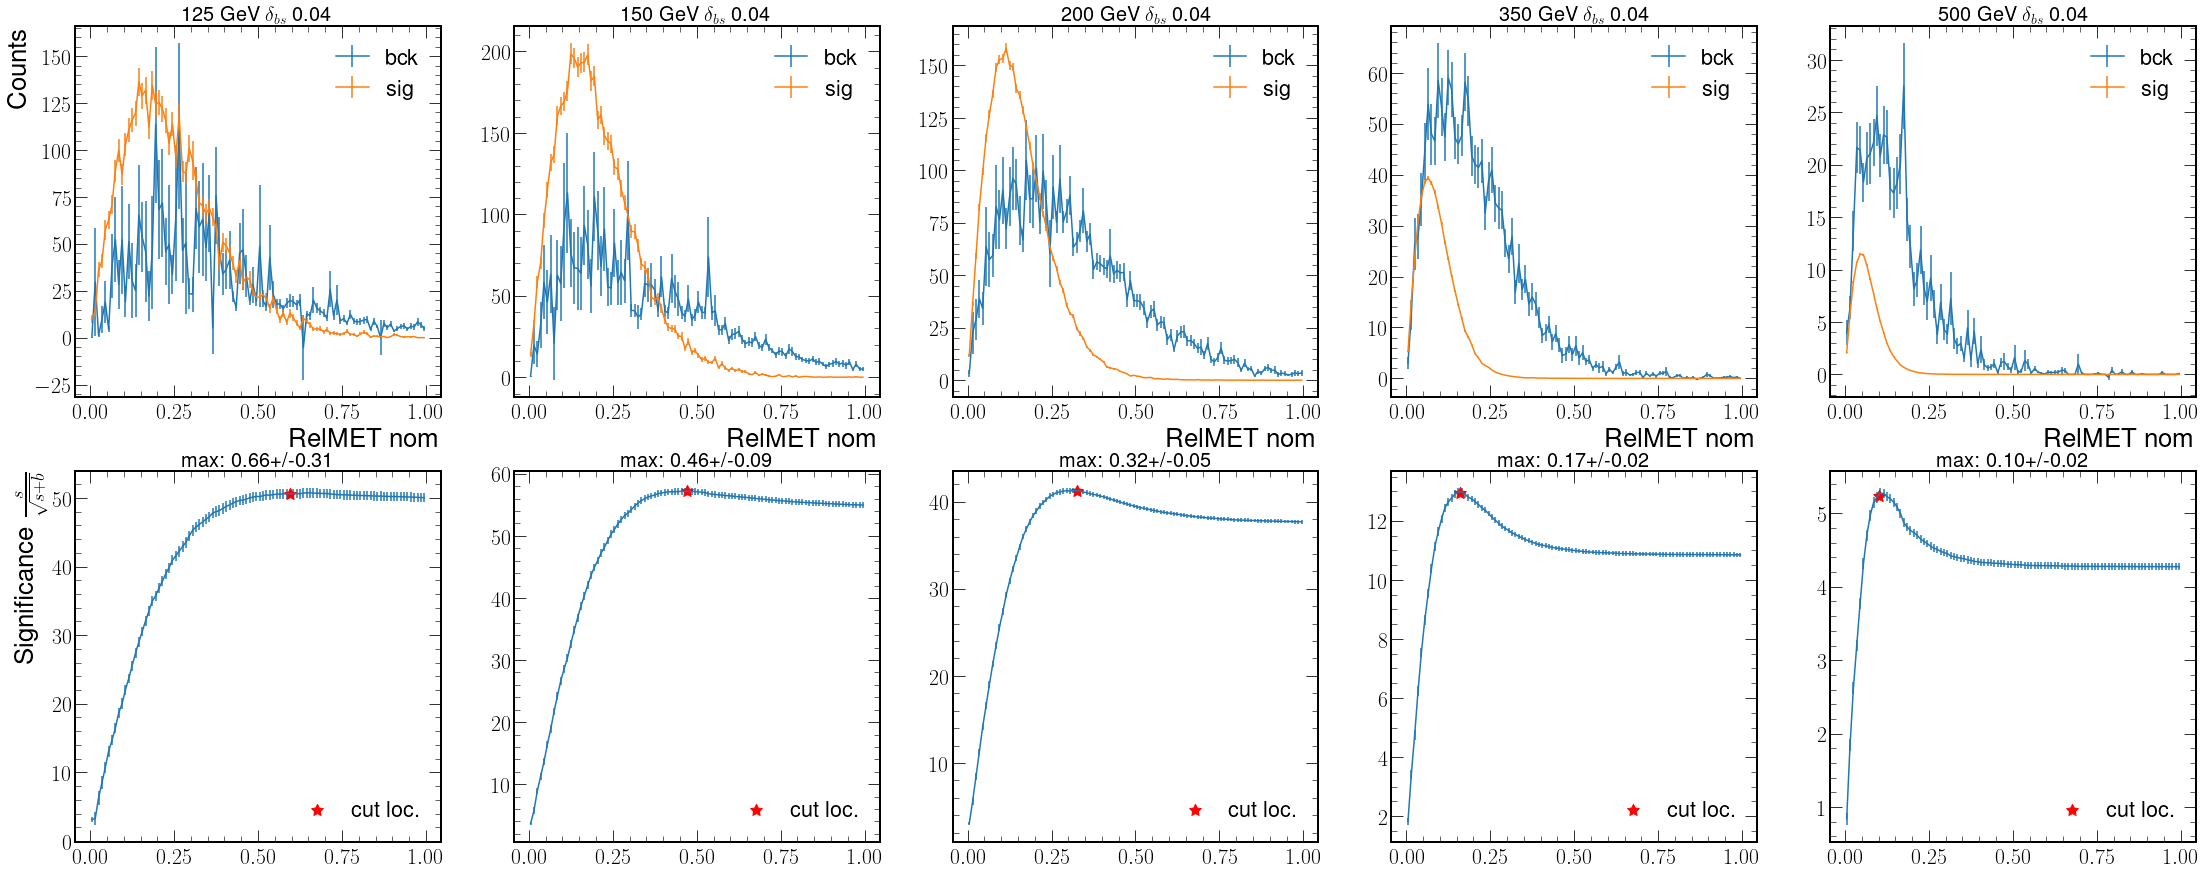

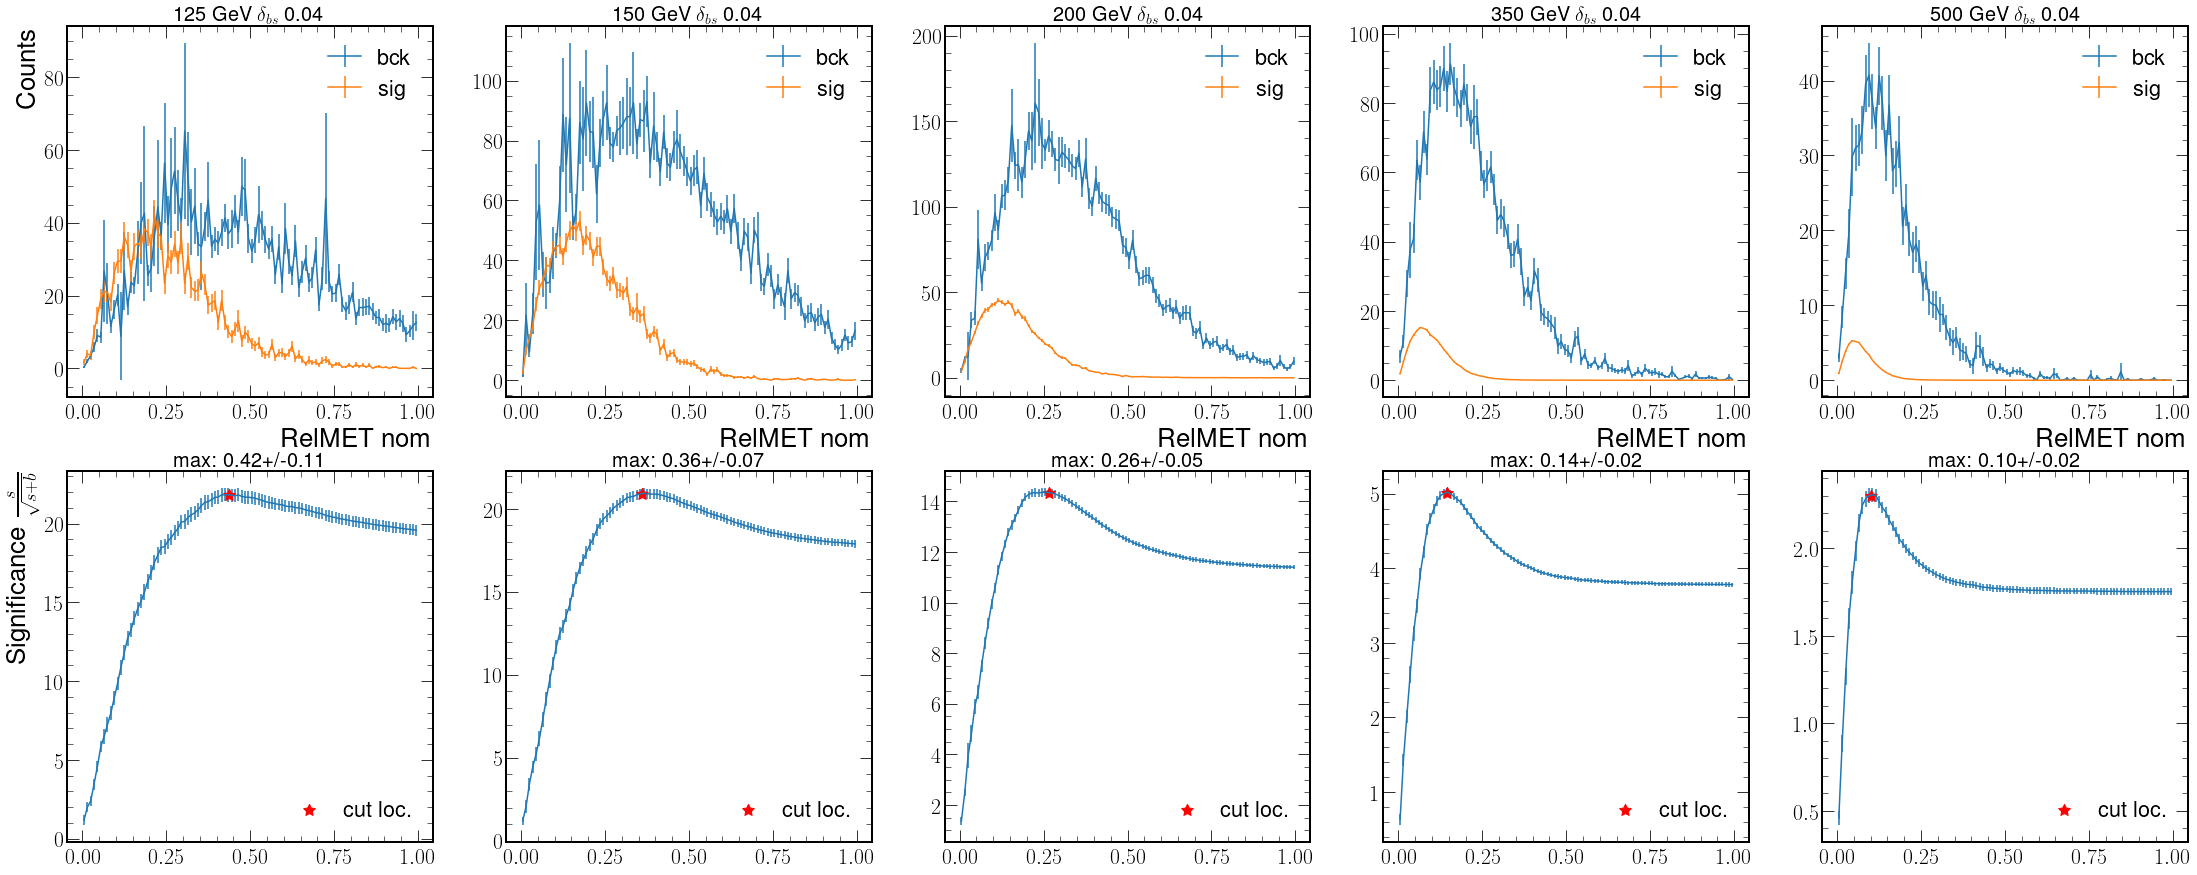

In [15]:
popt_relmet_1  = plot_opt_sig('RelMET_nom',bff_dict, background_df, power_func, filter_func=isin('SR1_nom'), postfix='_one_jet', p0=[300,-1.33])
popt_relmet_2  = plot_opt_sig('RelMET_nom',bff_dict, background_df, power_func, filter_func=isin('SR2_nom'), postfix='_two_jet', p0=[300,-1.2])

In [16]:
def band_cut2d(column1, column2, function, low=[0,-np.inf], high=[0,np.inf]):
    import pandas as pd 
    def cut_df(df):
        return df[(function(df[column1],*low) < df[column2]) & (function(df[column1],*high) > df[column2])]
    return cut_df    

In [17]:
def replace_bf_metadata(bf_dict, name1, name2):
    for reg in bf_dict:
        bf_dict[reg].axes[0].metadata = name1
        bf_dict[reg].axes[1].metadata = name2
    return bf_dict

def visualize_2d(col2, bff_dict, background_df, name='', filter_func=lambda x: x, title_size=20,**kwargs):
    '''This wont work if the plot producer doesn't ahve the right format'''
    col1= 'DiLepMass'
    test_cut_bck = filter_func(background_df)
    _, test_2d = produce_bff_hists(test_cut_bck, name, columns, weight='Weight')
    test_2d =  replace_bf_metadata(test_2d, col1, col2.replace('_',' '))
    
    sig_plts = {}
    for m in bff_samples:
        test_cut_sig = filter_func(bff_dict[m])
        _, test_2d_sig = produce_bff_hists(test_cut_sig, name, columns, weight='Weight')
        test_2d_sig =  replace_bf_metadata(test_2d_sig, col1, col2.replace('_',' '))
        sig_plts[m] = test_2d_sig
        
    fig,ax = plt.subplots(1,1+len(sig_plts), figsize=[38,7])
    boost_plot2d(ax[0], test_2d['{}_{}'.format(col1,col2)],log=1)
    ax[0].set_title('background')
    for i, (m,tdict) in enumerate(sig_plts.items()):
        boost_plot2d(ax[i+1], tdict['{}_{}'.format(col1,col2)],log=1)
        ax[i+1].set_ylabel('')
        ax[i+1].set_title(r'{} GeV $\delta_{{bs}}$ {}'.format(*m.split(' ')), fontsize=title_size)
    fig.savefig('output/sig_tuning/{}_{}_{}_2d.pdf'.format(name,col1,col2))

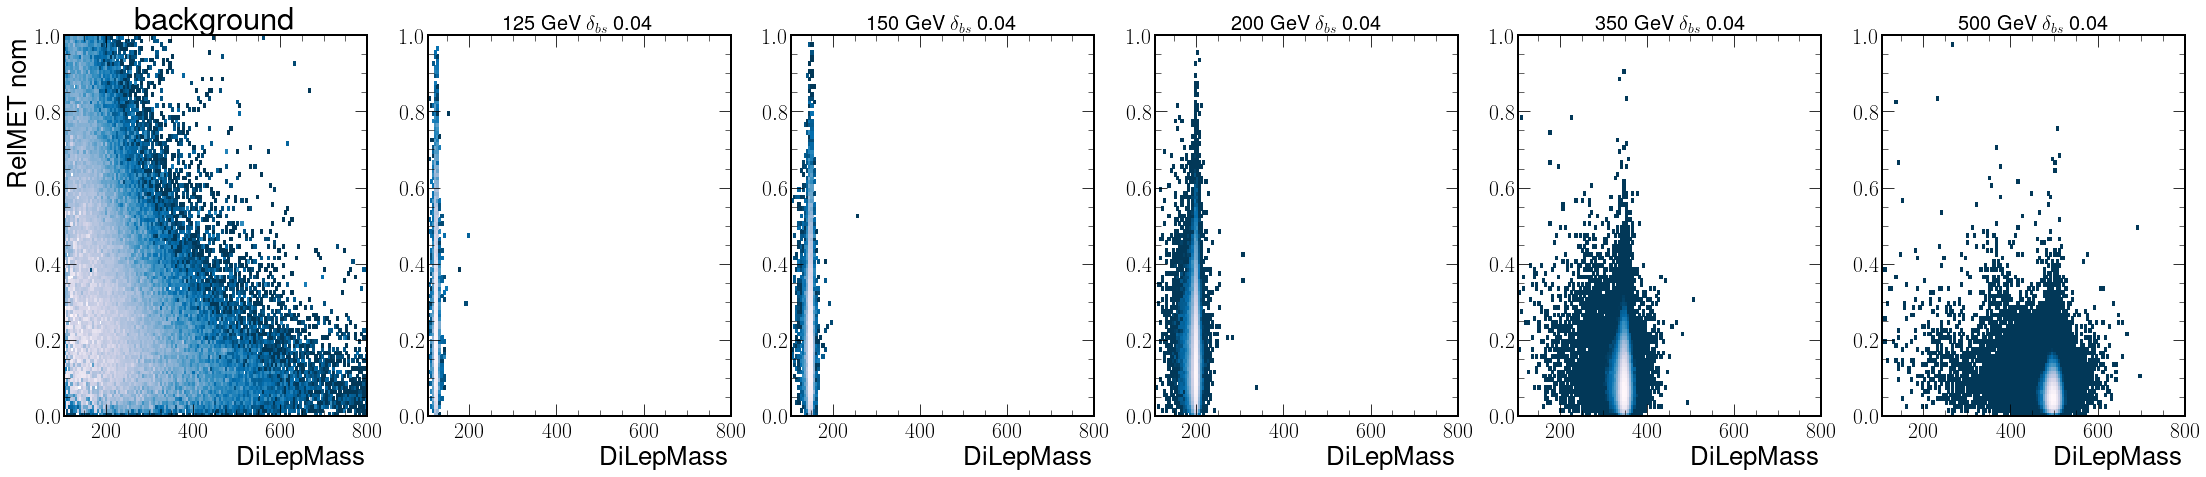

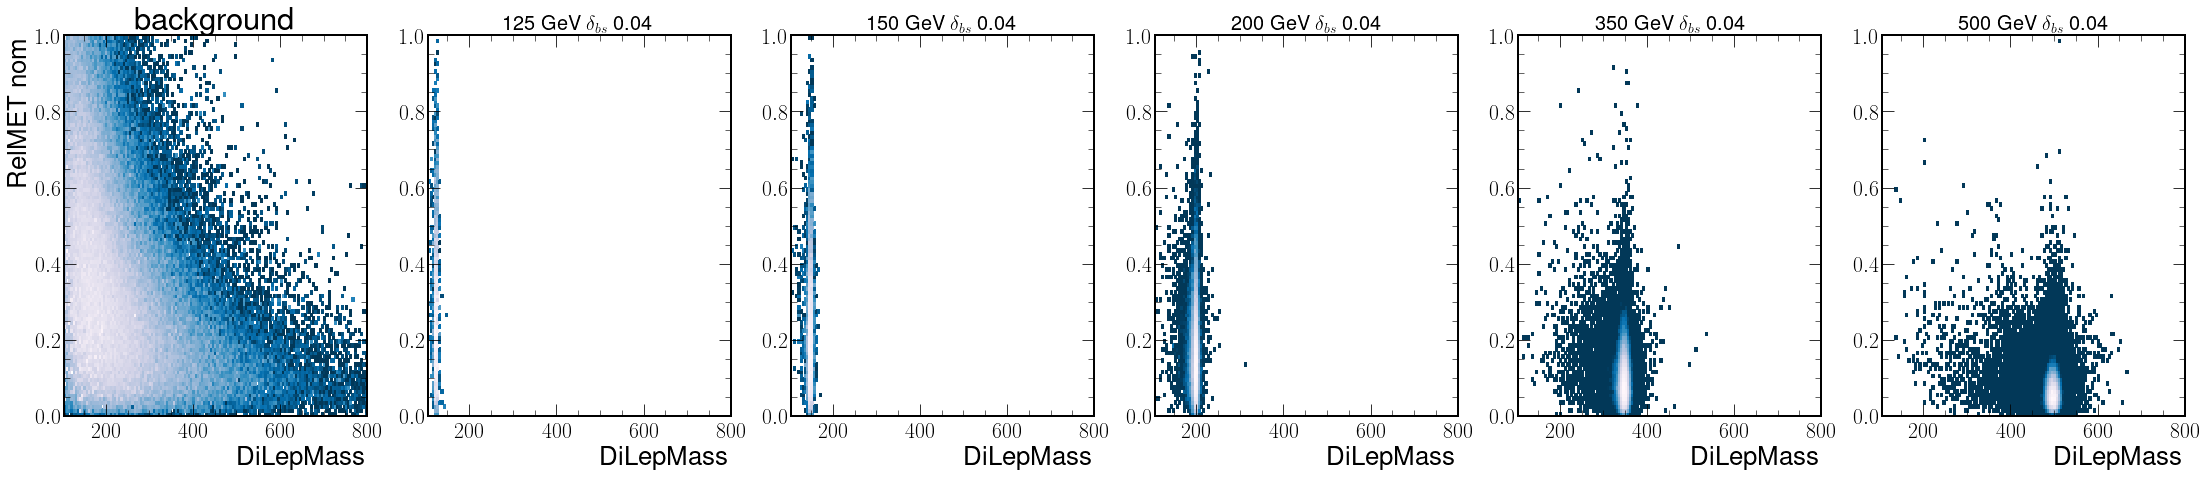

In [18]:
visualize_2d('RelMET_nom', bff_dict, background_df, name='oneJet_nocut', filter_func=isin('SR1_nom'))
visualize_2d('RelMET_nom', bff_dict, background_df, name='twoJet_nocut', filter_func=isin('SR2_nom'))

In [19]:
popt_relmet_1, popt_relmet_2

(array([280.31176385,  -1.27513632]), array([73.87886423, -1.06303597]))

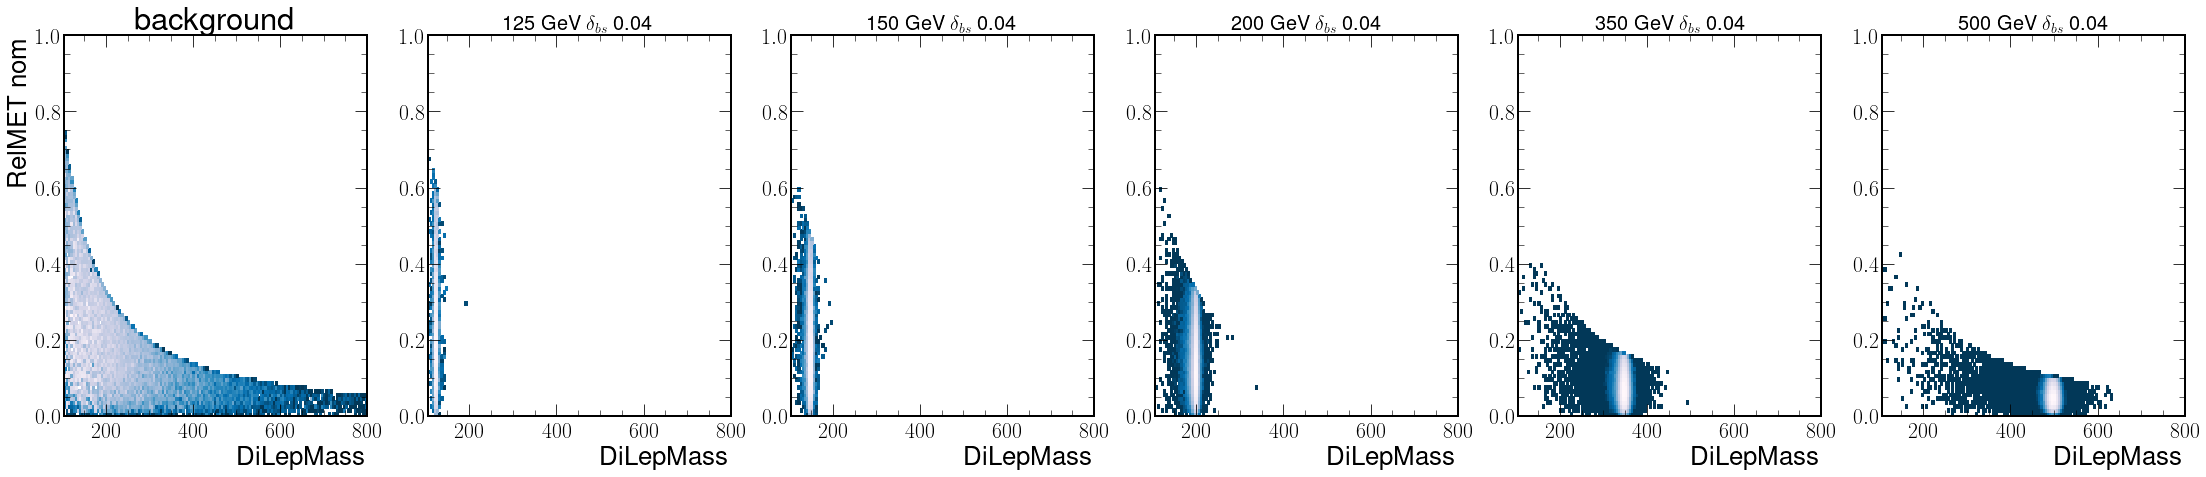

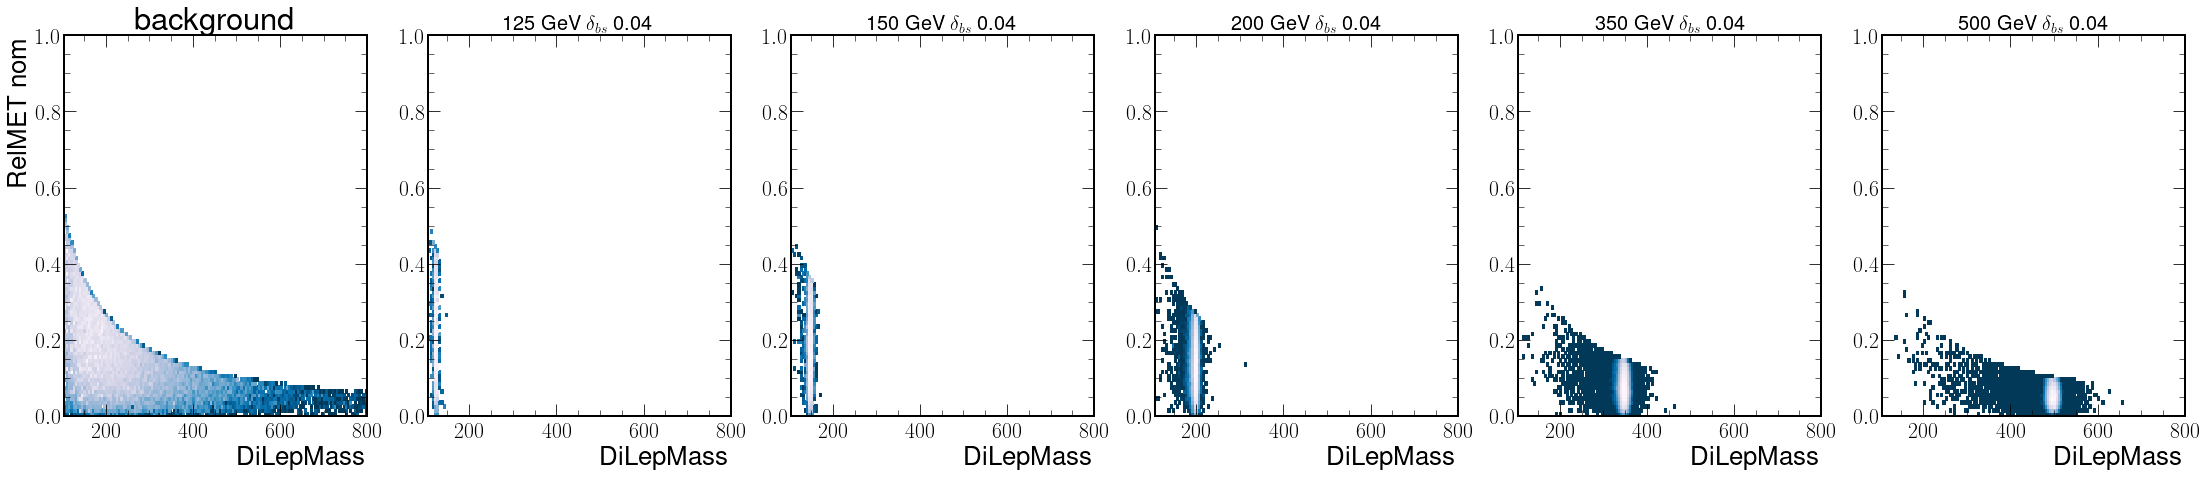

In [20]:
def RelMET_filter(df, col, *popt):
    return power_func(df.DiLepMass, *popt) > df[col]

RelMET_filter1 = lambda df, col: RelMET_filter(df, col, *popt_relmet_1)
RelMET_filter2 = lambda df, col: RelMET_filter(df, col, *popt_relmet_2)


RelMET_f1_SR1_nom = lambda df: apply_multiple_filters(df, [df.SR1_nom, RelMET_filter1(df, 'RelMET_nom')])
RelMET_f2_SR2_nom = lambda df: apply_multiple_filters(df, [df.SR2_nom, RelMET_filter2(df, 'RelMET_nom')])


visualize_2d('RelMET_nom', bff_dict, background_df, name='oneJet_cut', filter_func=RelMET_f1_SR1_nom)
visualize_2d('RelMET_nom', bff_dict, background_df, name='twoJet_cut', filter_func=RelMET_f2_SR2_nom)

      fun: -167.13380223281845
 hess_inv: array([[ 7.89070468e+01, -3.15434691e+04],
       [-3.15434691e+04,  1.26101495e+07]])
      jac: array([-1.91879272e-03, -5.72204590e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 216
      nit: 20
     njev: 68
   status: 2
  success: False
        x: array([ -1.03494914, 310.15230789])
50.592387743870724 180.78366536413463
57.146707306652466 154.9099368593325
41.20966640508832 103.16247984972824
12.886724258689982 -52.07989117908454
5.298316518511953 -207.32226220789732
      fun: -64.68659203685105
 hess_inv: array([[ 1.20624935e-01, -3.59253263e+01],
       [-3.59253263e+01,  1.37112387e+04]])
      jac: array([-0.00013256,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 141
      nit: 18
     njev: 43
   status: 2
  success: False
        x: array([ -1.10381097, 329.19081663])
21.77537394353379 191.21444527323604
20.830660373680196 163.6191710

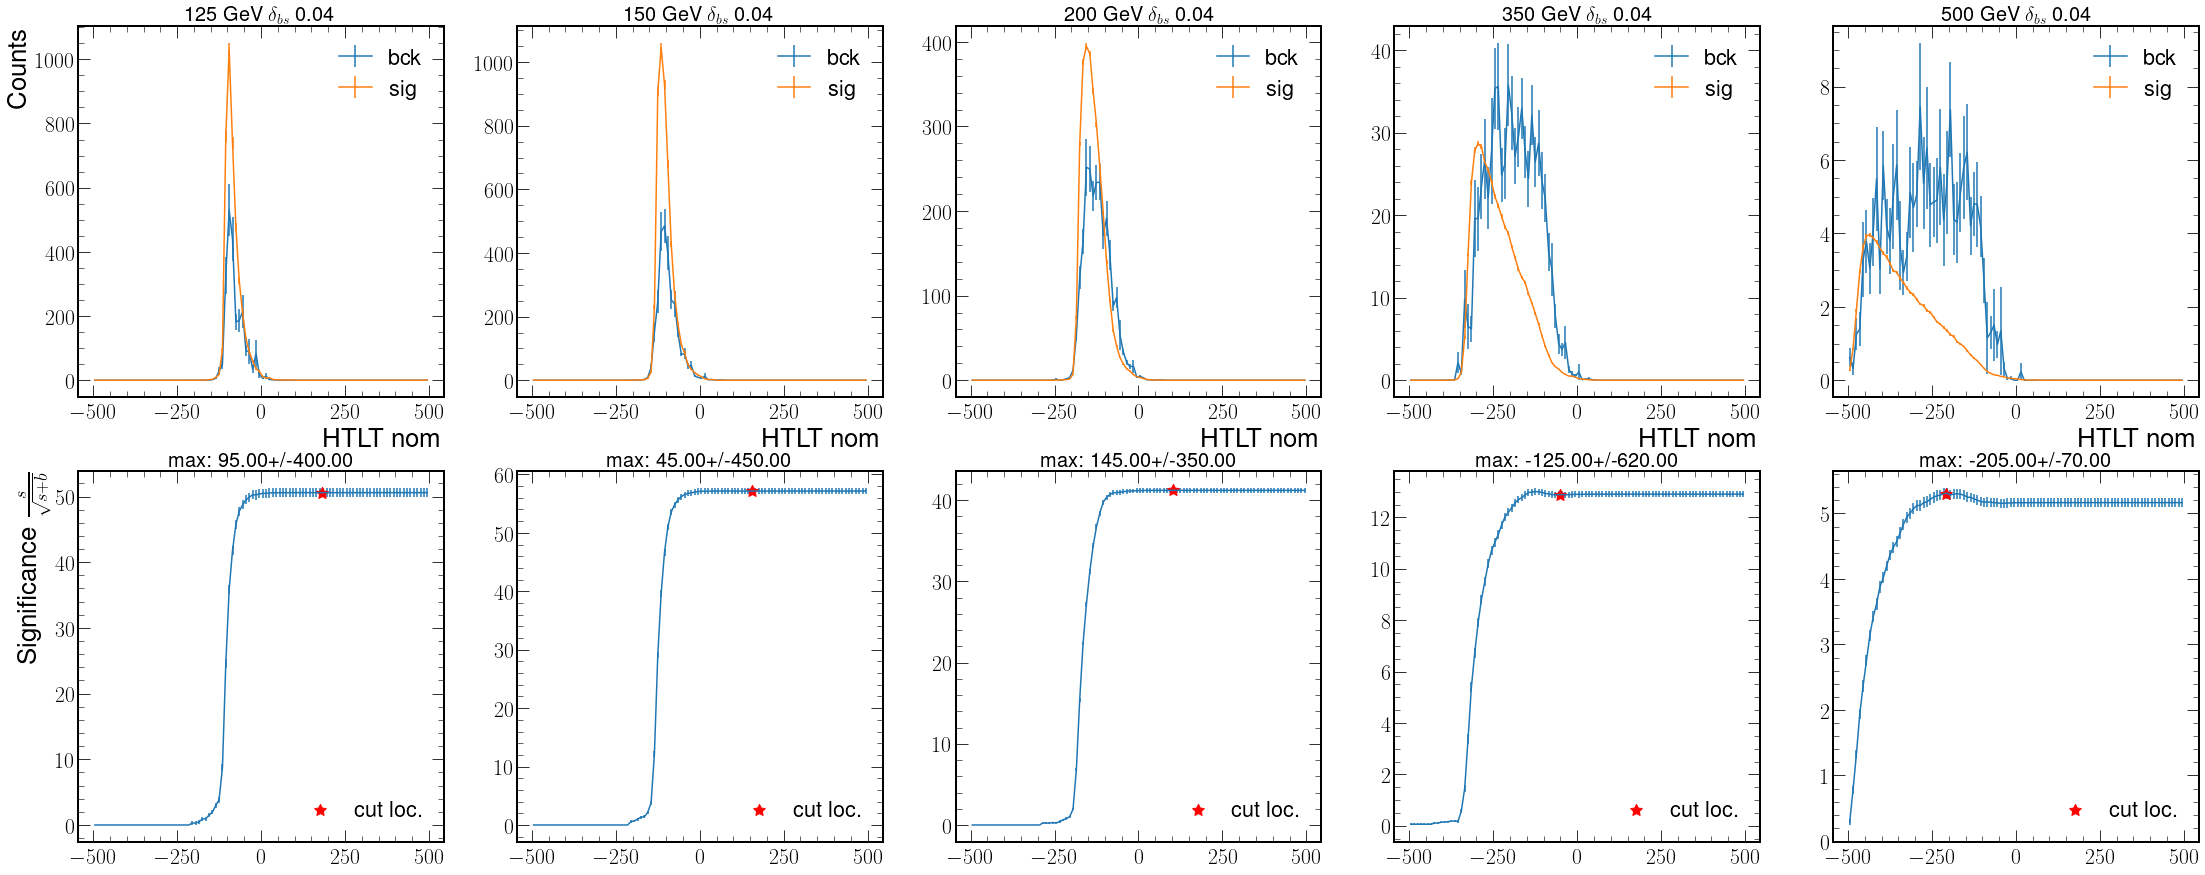

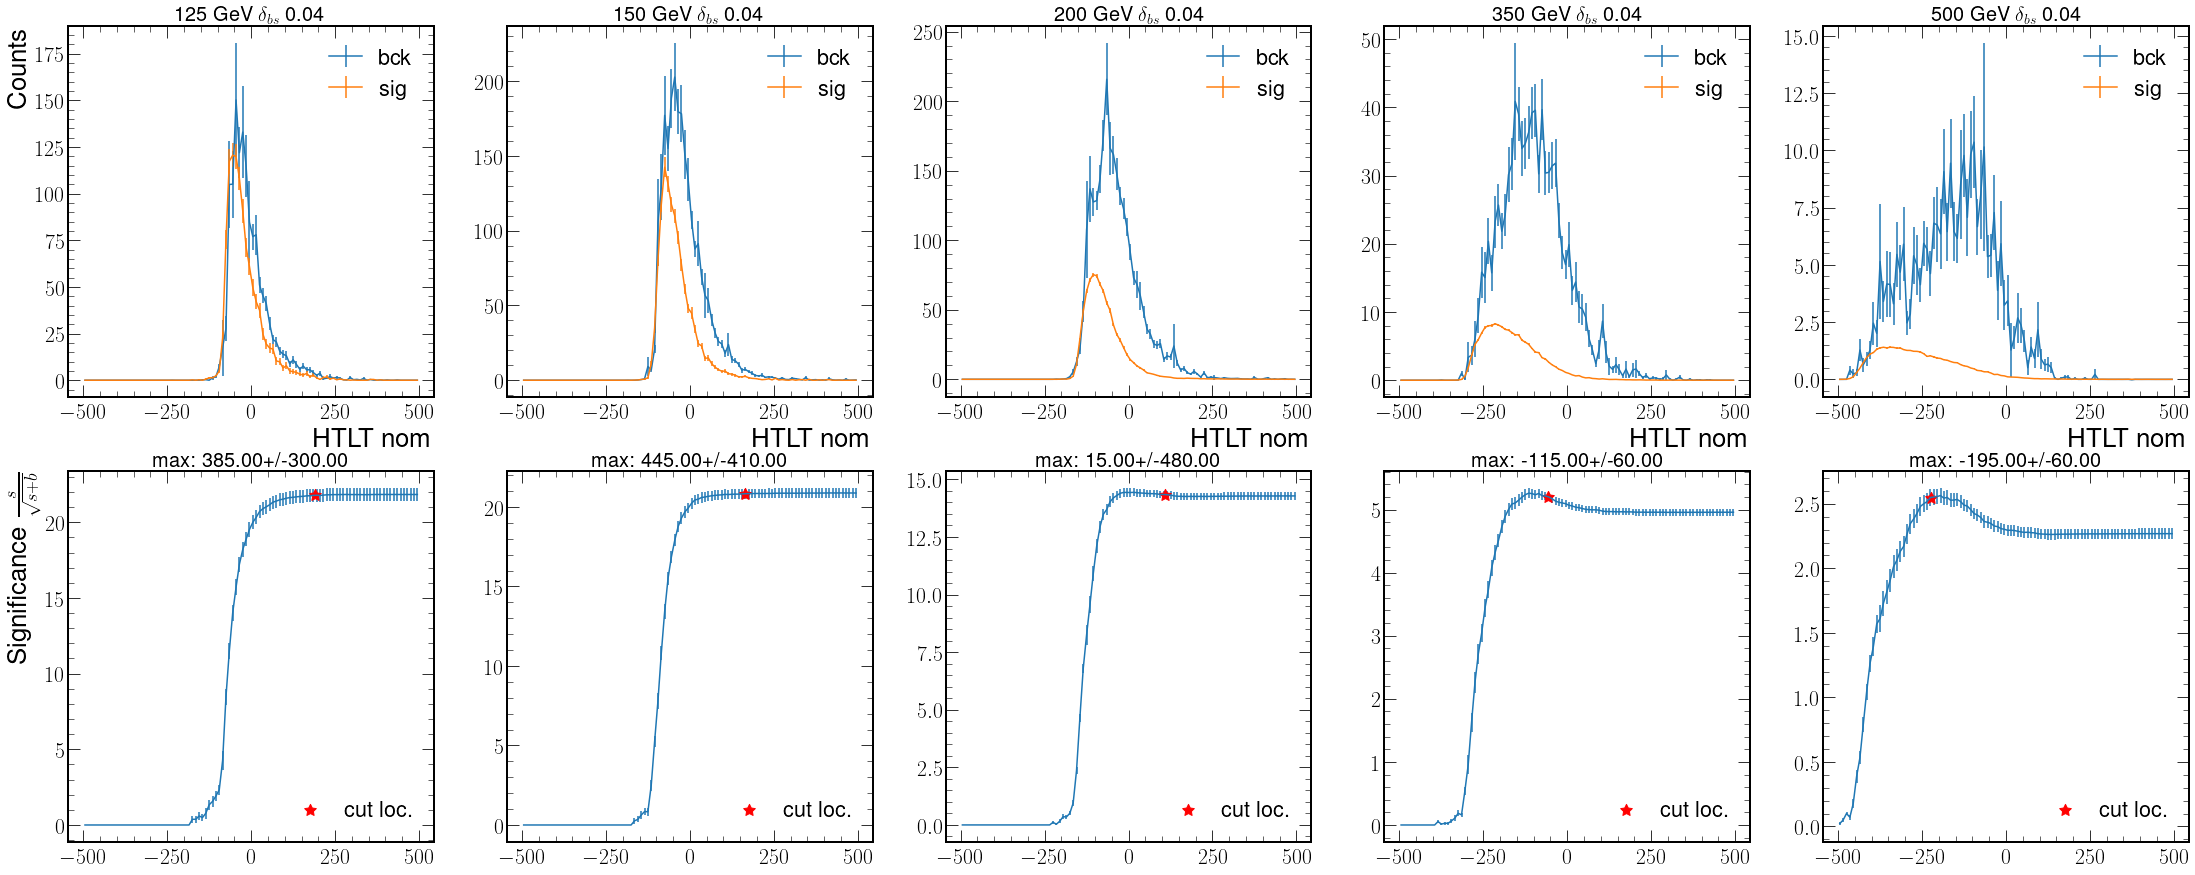

In [21]:
popt_htlt_1 = plot_opt_sig('HTLT_nom',bff_dict, background_df, linear, filter_func=RelMET_f1_SR1_nom, postfix='_one_jet', p0=[-1.13,351])
popt_htlt_2 = plot_opt_sig('HTLT_nom',bff_dict, background_df,linear, filter_func=RelMET_f2_SR2_nom, postfix='_two_jet', p0=[-1.11,332])

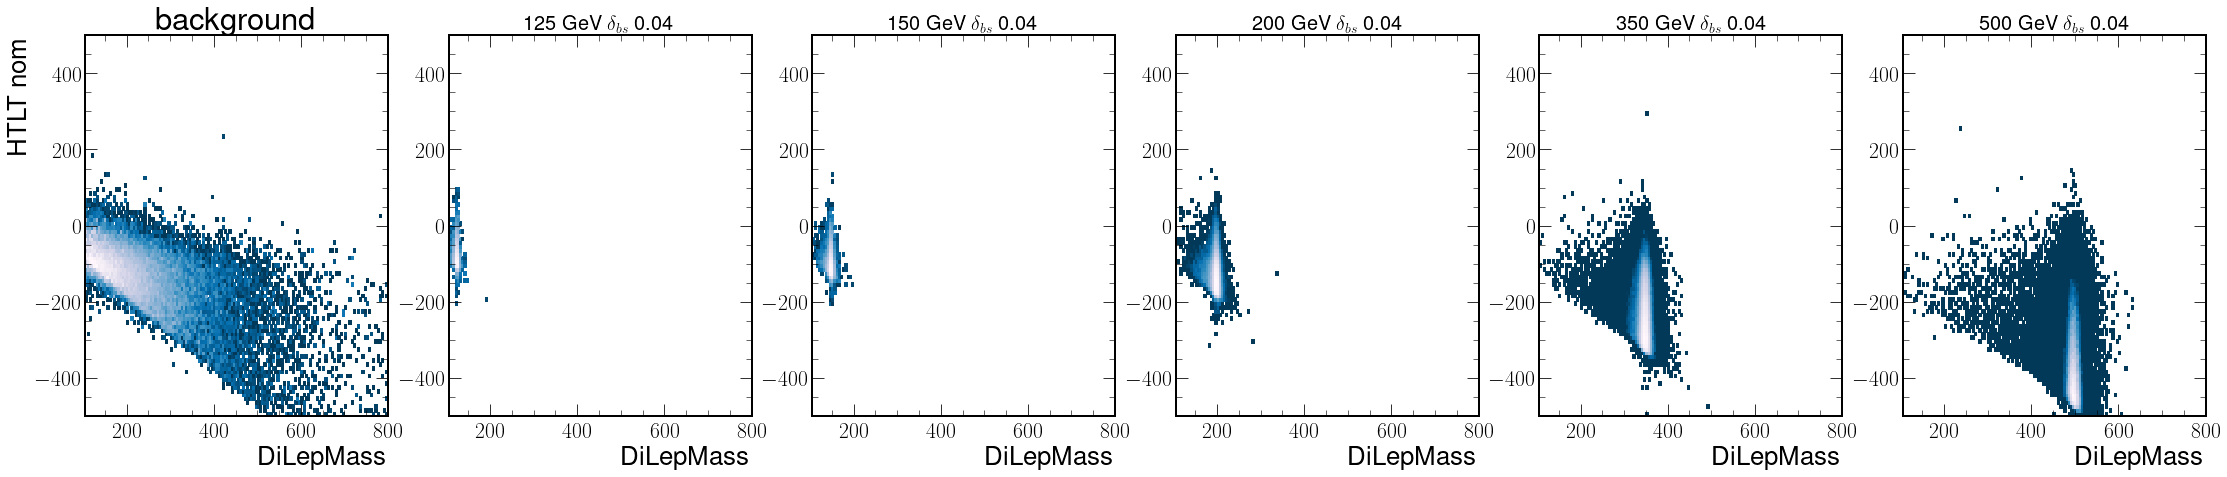

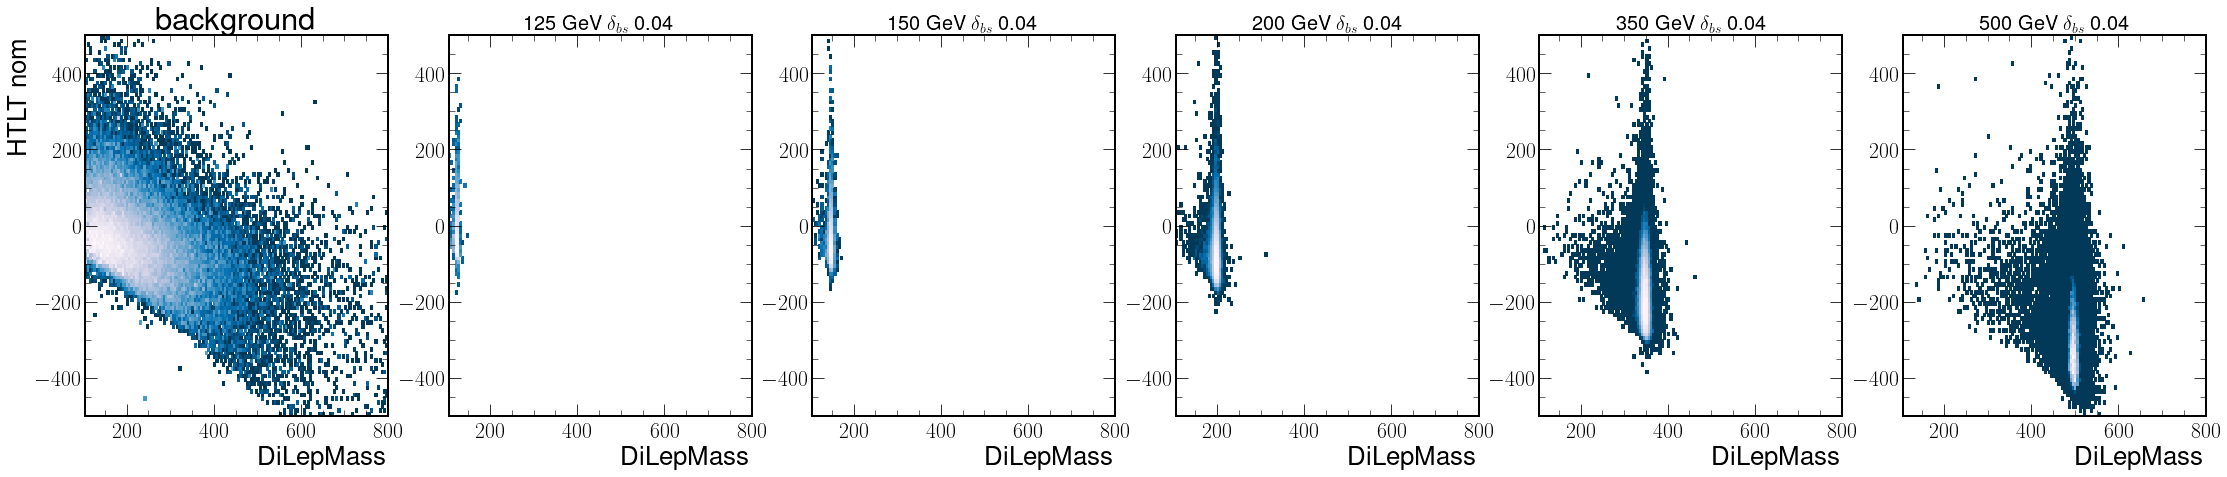

In [22]:
visualize_2d('HTLT_nom', bff_dict, background_df, name='oneJet_nocut', filter_func=RelMET_f1_SR1_nom)
visualize_2d('HTLT_nom', bff_dict, background_df, name='twoJet_nocut', filter_func=RelMET_f2_SR2_nom)

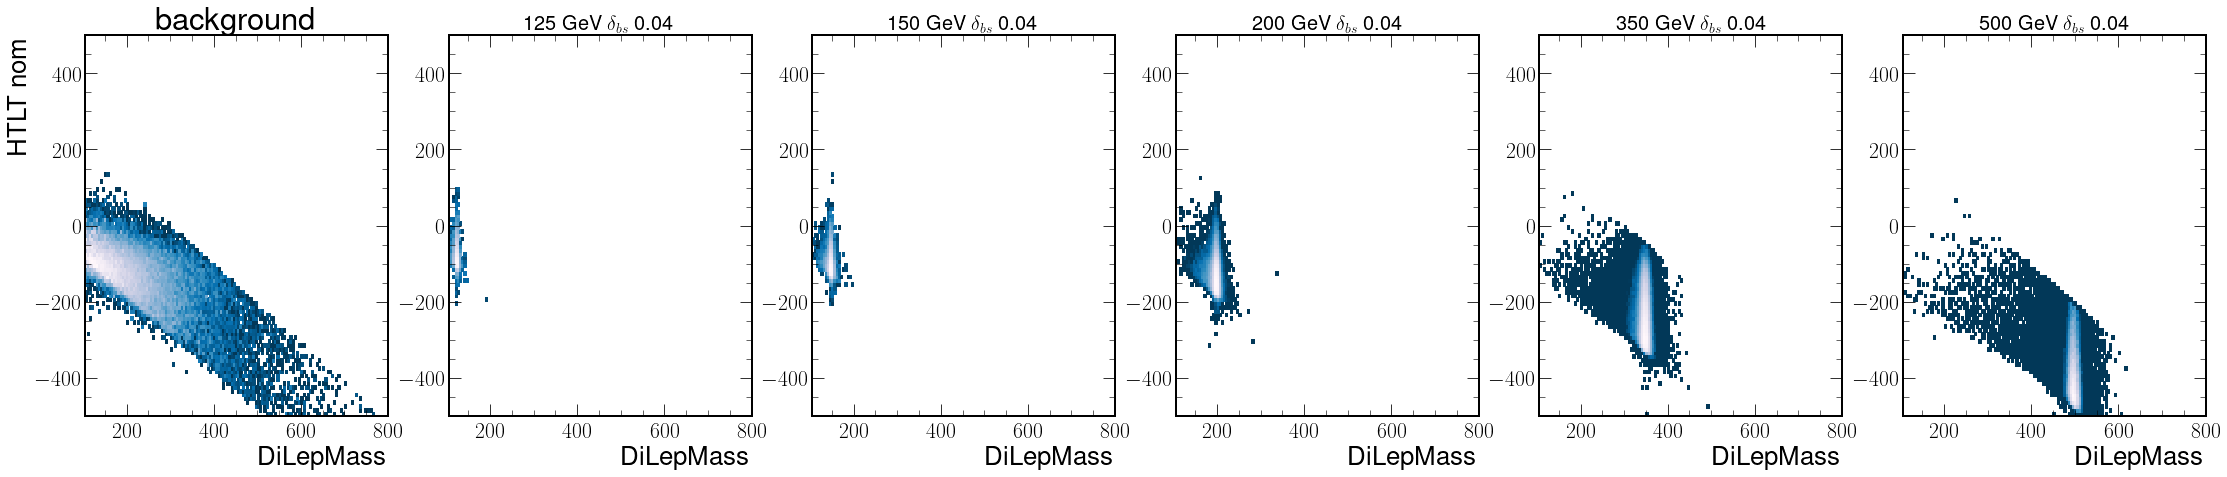

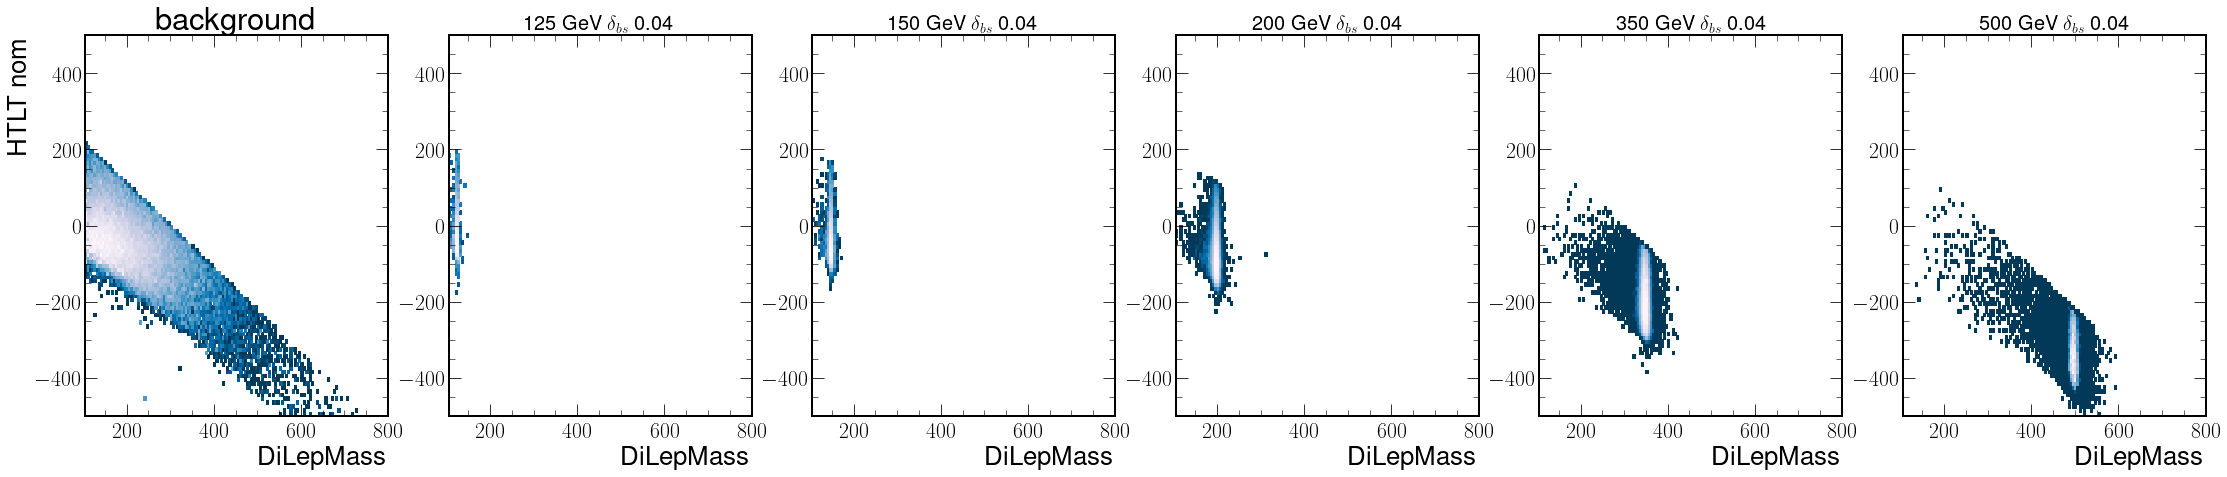

In [23]:
def HTLT_filter(df, col, *popt):
    return linear(df.DiLepMass, *popt) > df[col]

HTLT_filter1 = lambda df, col: HTLT_filter(df, col, *popt_htlt_1)
HTLT_filter2 = lambda df, col: HTLT_filter(df, col, *popt_htlt_2)


HTLT_f1_SR1_nom = lambda df: apply_multiple_filters(df, [df.SR1_nom, RelMET_filter1(df, 'RelMET_nom'), HTLT_filter1(df, 'HTLT_nom')])
HTLT_f2_SR2_nom = lambda df: apply_multiple_filters(df, [df.SR2_nom, RelMET_filter2(df, 'RelMET_nom'), HTLT_filter2(df, 'HTLT_nom')])

visualize_2d('HTLT_nom', bff_dict, background_df, name='oneJet_cut', filter_func=HTLT_f1_SR1_nom)
visualize_2d('HTLT_nom', bff_dict, background_df, name='twoJet_cut', filter_func=HTLT_f2_SR2_nom)

In [24]:
def heaviside(x, cutoff, scale):
    return np.heaviside(x-cutoff, 0)*scale

      fun: -167.0673799454492
 hess_inv: array([[1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.06526277e+05]])
      jac: array([0.00000000e+00, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 5
     njev: 14
   status: 0
  success: True
        x: array([300.        ,  -5.53997514])
50.590442254646696 -0.0
57.14249146818903 -0.0
41.20757537871947 -0.0
12.877247800211391 -5.539975143832133
5.249623043677604 -5.539975143832133
      fun: -65.5826077863243
 hess_inv: array([[1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.8895583e+04]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 2
     njev: 13
   status: 0
  success: True
        x: array([225.        , 160.08797074])
21.77897496937758 0.0
20.826997300664015 0.0
14.340530615572757 0.0
5.916124179406722 160.0879707384929
2.719980721298233 160.0879707384929


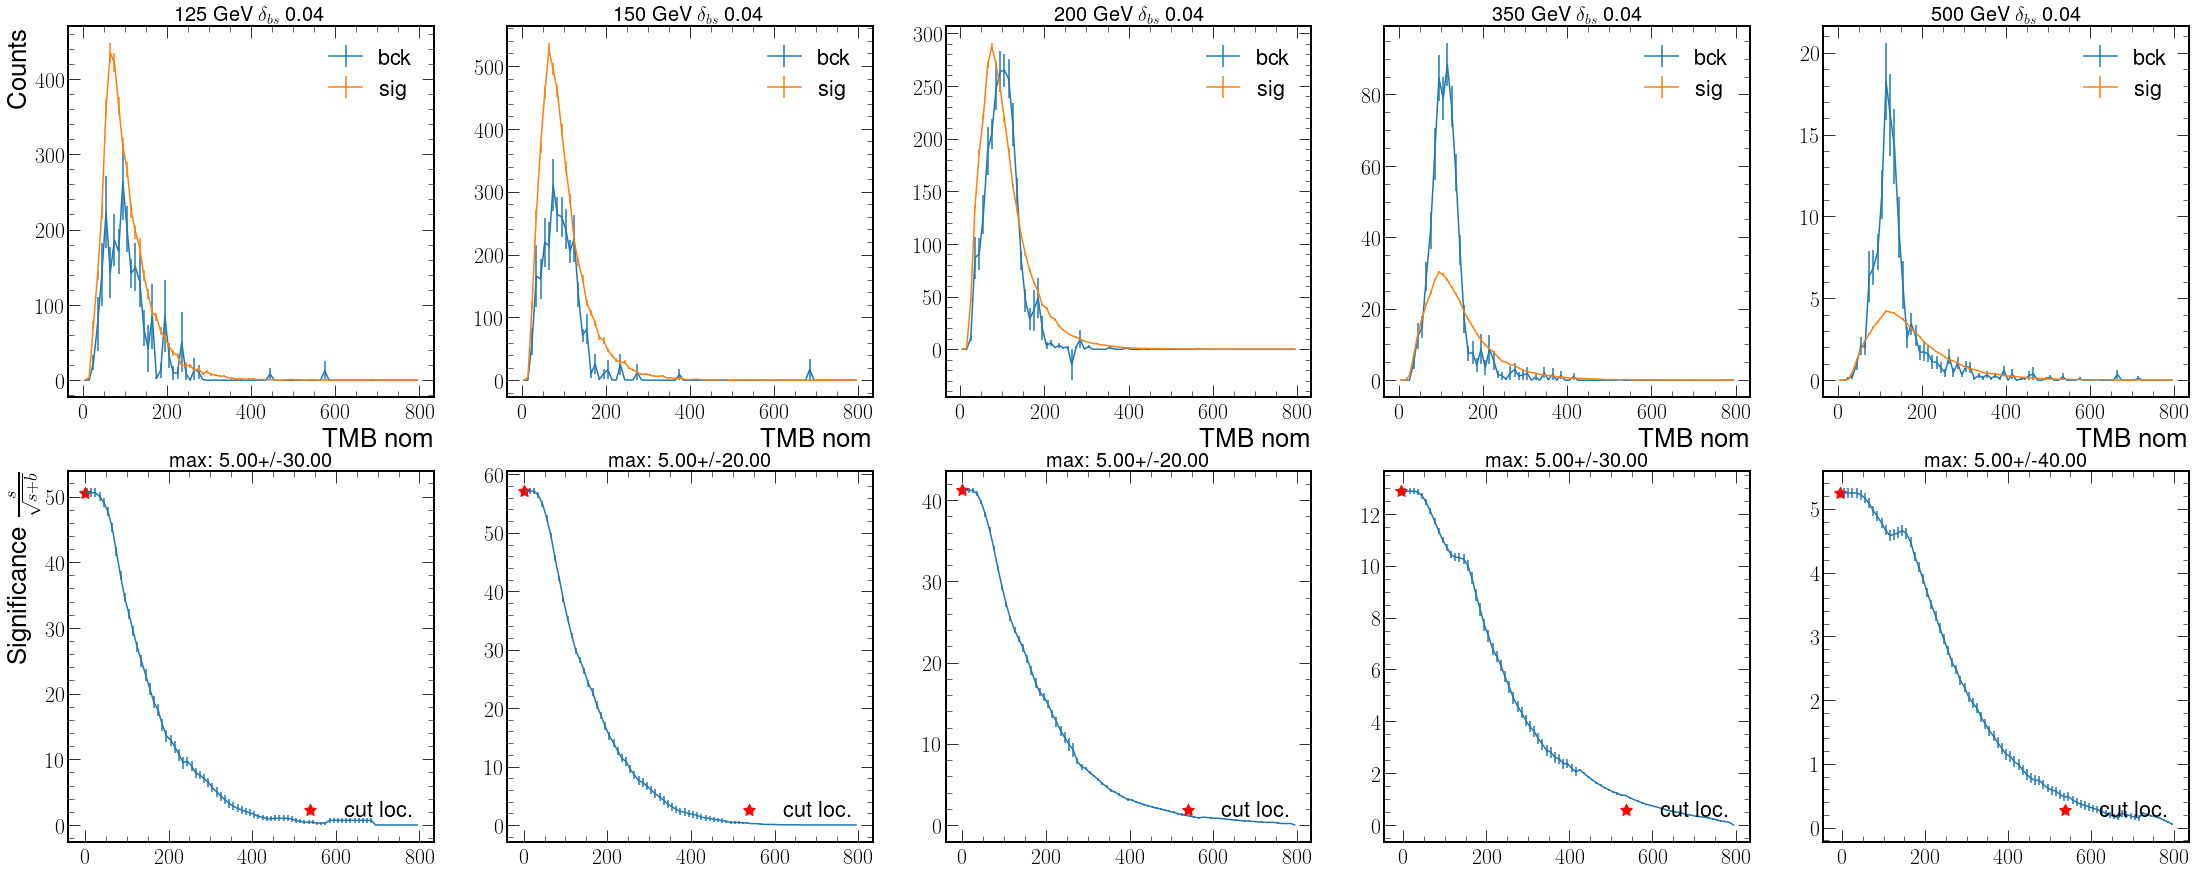

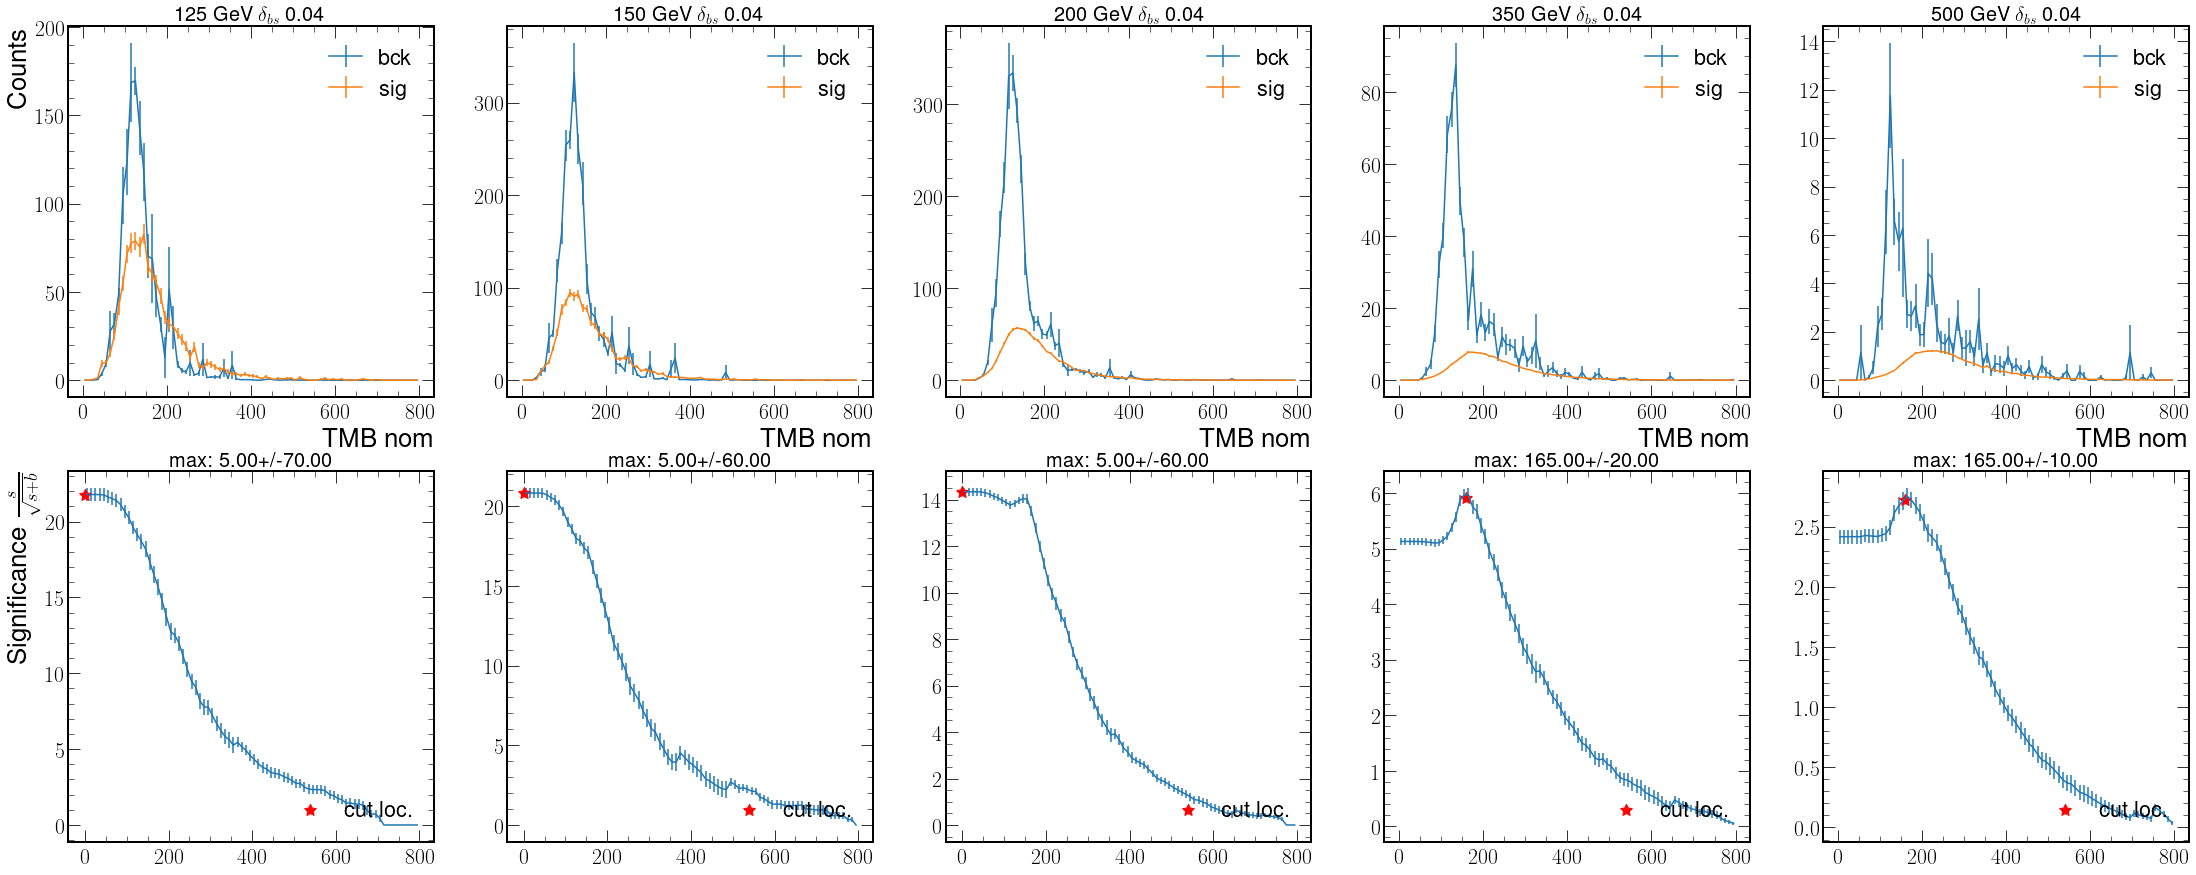

In [25]:
popt_TMB_1 = plot_opt_sig('TMB_nom',bff_dict, background_df,heaviside, filter_func=HTLT_f1_SR1_nom, postfix='_one_jet',direction=-1, p0=[300,100])
popt_TMB_2 = plot_opt_sig('TMB_nom',bff_dict, background_df,heaviside, filter_func=HTLT_f2_SR2_nom, postfix='_two_jet',direction=-1, p0=[225,100])

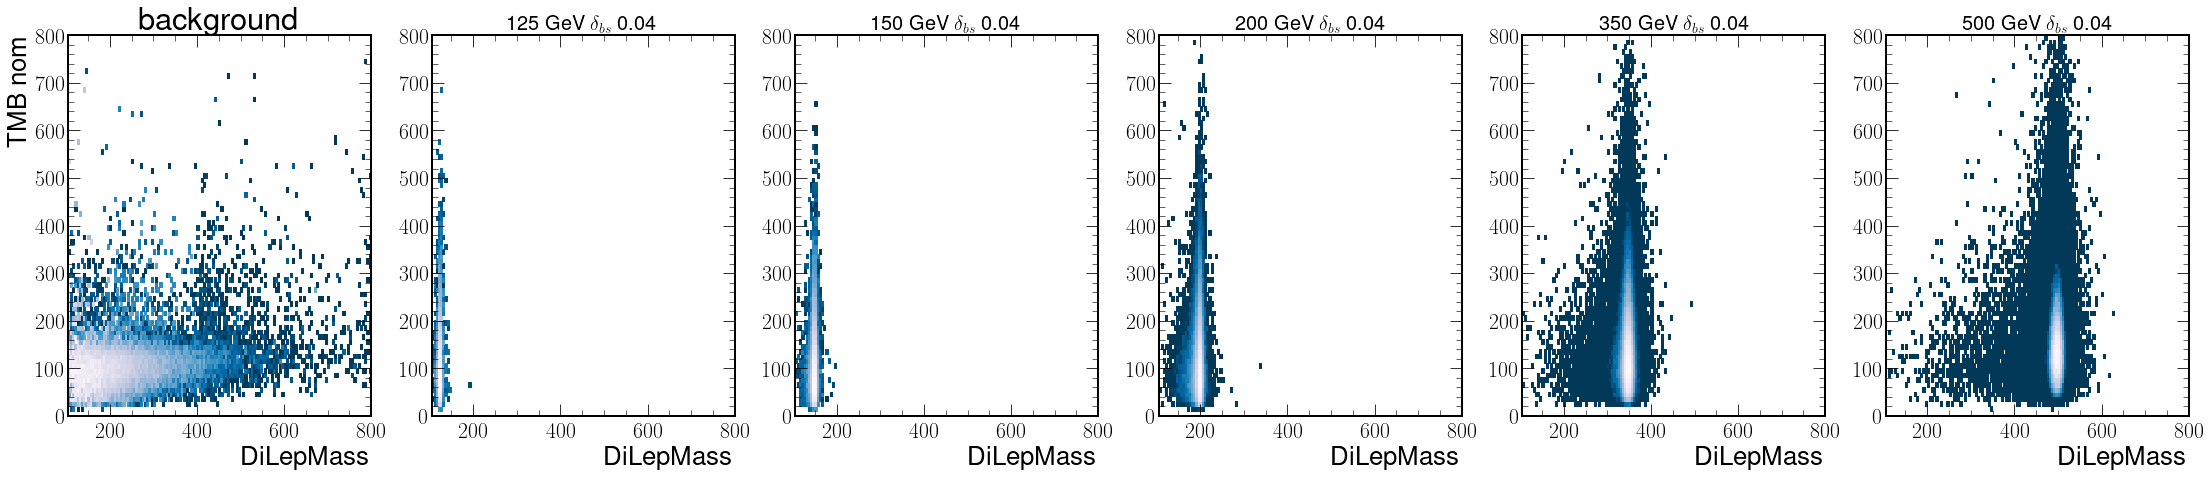

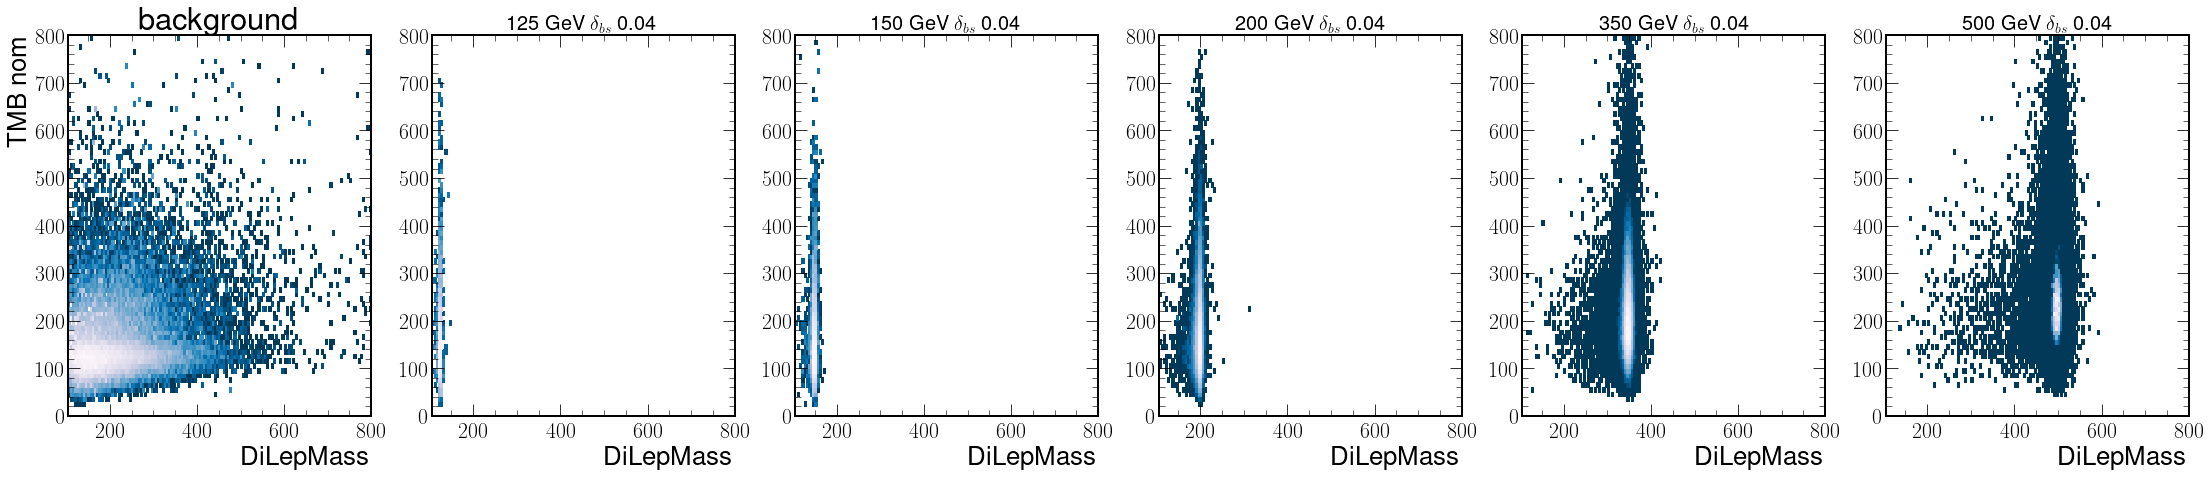

In [26]:
visualize_2d('TMB_nom', bff_dict, background_df, name='oneJet_nocut', filter_func=HTLT_f1_SR1_nom)
visualize_2d('TMB_nom', bff_dict, background_df, name='twoJet_nocut', filter_func=HTLT_f2_SR2_nom)

In [27]:
popt_TMB_2

array([225.        , 160.08797074])

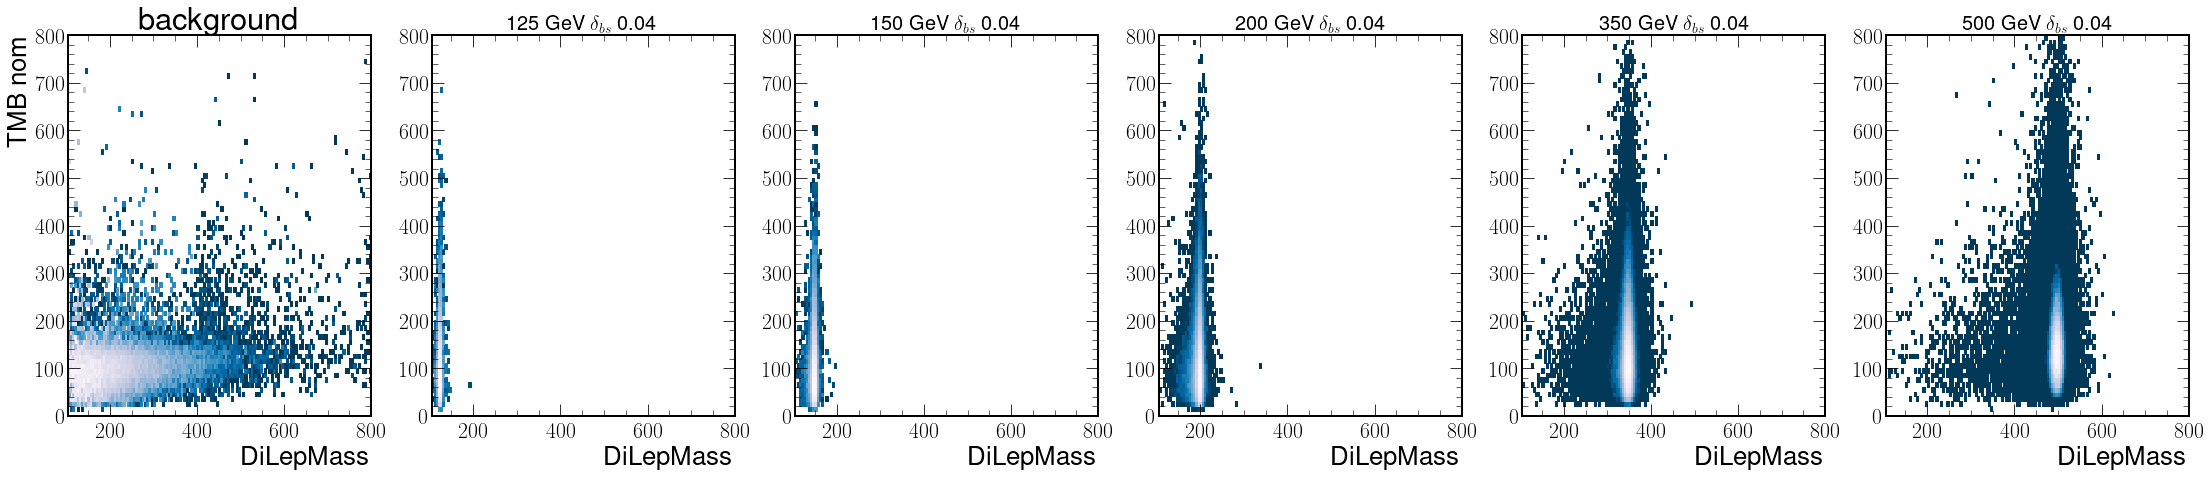

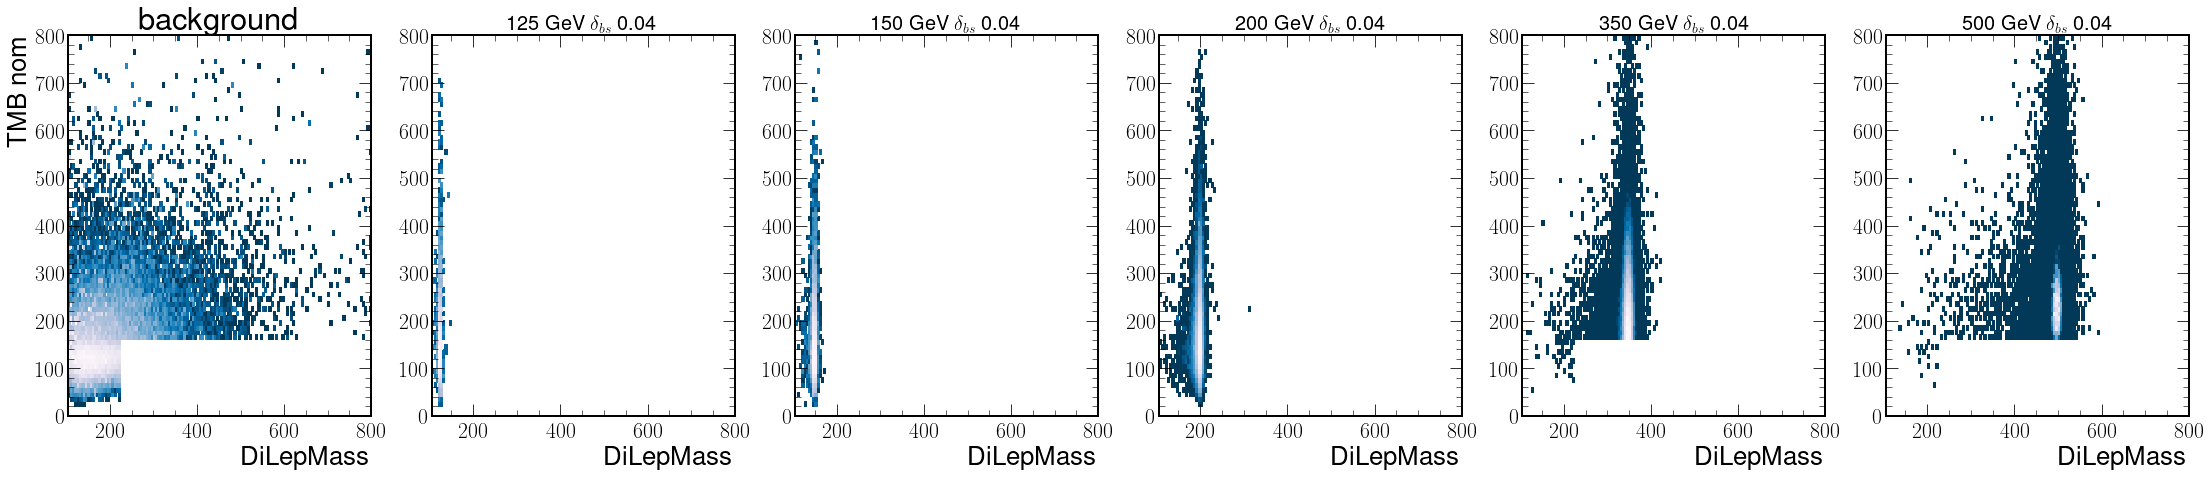

In [28]:
def TMB_filter(df, col, *popt):
    return heaviside(df.DiLepMass, *popt) < df[col]

TMB_filter1 = lambda df, col: TMB_filter(df, col, *popt_TMB_1)
TMB_filter2 = lambda df, col: TMB_filter(df, col, *popt_TMB_2)


TMB_f1_SR1_nom = lambda df: apply_multiple_filters(df, [df.SR1_nom, RelMET_filter1(df, 'RelMET_nom'), HTLT_filter1(df, 'HTLT_nom'), TMB_filter1(df, 'TMB_nom') ])
TMB_f2_SR2_nom = lambda df: apply_multiple_filters(df, [df.SR2_nom, RelMET_filter2(df, 'RelMET_nom'), HTLT_filter2(df, 'HTLT_nom'), TMB_filter2(df, 'TMB_nom')])


visualize_2d('TMB_nom', bff_dict, background_df, name='oneJet_cut', filter_func=TMB_f1_SR1_nom)
visualize_2d('TMB_nom', bff_dict, background_df, name='twoJet_cut', filter_func=TMB_f2_SR2_nom)

In [29]:
import dill as pickle

In [30]:
param_dict = {
    "popt_TMB_1":popt_TMB_1,
    "popt_TMB_2":popt_TMB_2,
    "popt_htlt_1":popt_htlt_1,
    "popt_htlt_2":popt_htlt_2,
    "popt_relmet_1":popt_relmet_1,
    "popt_relmet_2":popt_relmet_2,
    #'htlt_func': 'linear',
    #'relmet_func':'power',
    #'TMB_func': 'heaviside',
    #"RelMET_filter1":RelMET_filter1,
    #"RelMET_filter2":RelMET_filter2,
    #"TMB_filter1":TMB_filter1,
    #"TMB_filter2":TMB_filter2,
    #"HTLT_filter1":HTLT_filter1,
    #"HTLT_filter2":HTLT_filter2,
    #'bff_1': lambda df,jv: apply_multiple_filters(df, [RelMET_filter1(df, 'RelMET_{}'.format(jv)), HTLT_filter1(df, 'HTLT_{}'.format(jv)), TMB_filter1(df, 'TMB_{}'.format(jv))]),
    #'bff_2': lambda df,jv: apply_multiple_filters(df, [RelMET_filter2(df, 'RelMET_{}'.format(jv)), HTLT_filter2(df, 'HTLT_{}'.format(jv)), TMB_filter2(df, 'TMB_{}'.format(jv))]),
}

In [31]:
import yaml
with open('bff_cut.yml', 'w') as f:
     yaml.dump(param_dict, f)

In [32]:
with open('bff_cut.dill', 'wb') as f:
    pickle.dump(param_dict, f)

In [33]:
with open('bff_cut.dill', 'rb') as f:
    param_dict_loaded = pickle.load(f)

In [35]:
param_dict

{'popt_TMB_1': array([300.        ,  -5.53997514]),
 'popt_TMB_2': array([225.        , 160.08797074]),
 'popt_htlt_1': array([ -1.03494914, 310.15230789]),
 'popt_htlt_2': array([ -1.10381097, 329.19081663]),
 'popt_relmet_1': array([280.31176385,  -1.27513632]),
 'popt_relmet_2': array([73.87886423, -1.06303597])}